In [39]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

'1.3.4'

In [40]:
C.TFBS_from_motifs(regions="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/enhancers/HepG2_enhancers.bed", 
                   motifs="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/hg19_masked.fa", 
                   threads=8)

#### running count_within() with stranded option turned on

In [76]:
C.count_within(stranded=True, threads=8)
C.market_basket()

### Analyze preferential orientation of motifs

##### First, we create a directionality analysis for the rules found:


In [77]:
df = C.analyze_orientation()

INFO: Rules are symmetric - scenarios counted are: ['same', 'opposite']


In [78]:
df.head()

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF1-KLF9,KLF1,KLF9,683,0.898975,0.101025,0.564236,1.406519e-96
KLF12-KLF9,KLF12,KLF9,637,0.912088,0.087912,0.582780,4.216108e-96
KLF9-SP1,KLF9,SP1,792,0.866162,0.133838,0.517831,2.260039e-94
SP1-SP2,SP1,SP2,1700,0.747059,0.252941,0.349394,2.903800e-92
KLF1-KLF3,KLF1,KLF3,860,0.844186,0.155814,0.486753,1.272837e-90


We can subset these on pvalue and number of sites:

In [87]:
selected = df[(df["pvalue"] < 0.01)
              & (df["TF1_TF2_count"] > 50)]

In [80]:
#Number of TF pairs with significant differences in orientation
selected.shape[0]

1353

### Visualization of orientation preference

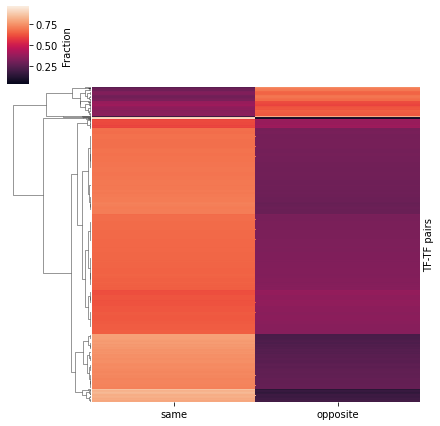

In [46]:
_ = selected.plot_heatmap()

We can select the subsets by investigating the selected pairs:

In [81]:
selected.sort_values("same").tail(5)

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF12-KLF4,KLF12,KLF4,327,0.920489,0.079511,0.594662,3.151907e-52
KLF9-KLF9,KLF9,KLF9,345,0.927536,0.072464,0.604628,8.408487e-57
KLF4-KLF9,KLF4,KLF9,336,0.934524,0.065476,0.614509,3.929475e-57
KLF4-KLF4,KLF4,KLF4,99,0.949495,0.050505,0.635682,3.725006e-19
ZNF331-ZNF331,ZNF331,ZNF331,89,0.955056,0.044944,0.643547,9.006312e-18


In [83]:
selected.sort_values("opposite").tail(5)

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF1-ZFX,KLF1,ZFX,121,0.231405,0.768595,0.379851,3.440008e-09
KLF12-ZFX,KLF12,ZFX,89,0.179775,0.820225,0.452866,1.522269e-09
ZIC3-ZNF768,ZIC3,ZNF768,73,0.178082,0.821918,0.455261,3.777848e-08
KLF9-ZFX,KLF9,ZFX,96,0.135417,0.864583,0.515599,9.042597e-13
ZKSCAN1-ZNF768,ZKSCAN1,ZNF768,63,0.031746,0.968254,0.662211,1.059203e-13



### Extended analysis with directional=True

#### The first analysis presented does not take into account the relative order of TF1-TF2, e.g. if the orientation "same" represents "TF1-TF2" or


In [58]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()
#C.to_pickle('/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/analyse/orientation_extAnalysisObject_hepG2.pkl')

In [59]:
df = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


In [60]:
df.head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SP1-SP1,SP1,SP1,1490,0.442282,0.442282,0.065101,0.050336,0.222110,6.857407e-191
MAZ-MAZ,MAZ,MAZ,2004,0.414172,0.414172,0.097305,0.074351,0.189801,1.795362e-187
SP2-SP2,SP2,SP2,1728,0.414931,0.414931,0.096065,0.074074,0.190657,4.627985e-163
SP3-SP3,SP3,SP3,1463,0.425837,0.425837,0.086808,0.061517,0.203302,5.847423e-157
ZNF467-ZNF467,ZNF467,ZNF467,1541,0.415315,0.415315,0.093446,0.075925,0.191023,6.207794e-146


similarly to the first analysis, we can select the significant pairs and visualize the preferences for orientation:

In [61]:
selected = df[(df["pvalue"] < 0.05)
              & (df["TF1_TF2_count"] > 50)]

In [88]:
selected.shape[0]

1353

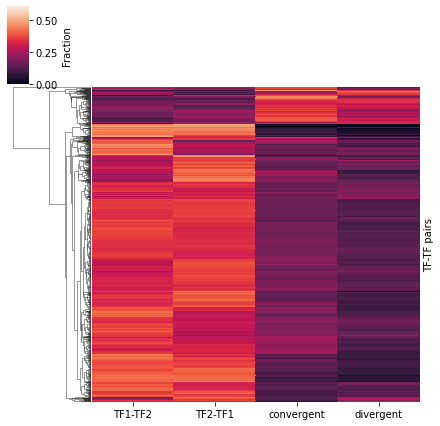

In [62]:
_ = selected.plot_heatmap()


### In-depth look at preferential orientation



By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.


#### TFs specific in TF1-TF2 orientation

In [74]:
selected.sort_values("TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF4-ZNF331,KLF4,ZNF331,51,0.509804,0.313725,0.117647,0.058824,0.204634,1.141334e-05
SP4-TBX3,SP4,TBX3,53,0.509434,0.207547,0.113208,0.169811,0.177248,1.712776e-04
VDR-ZNF341,VDR,ZNF341,55,0.509091,0.272727,0.145455,0.072727,0.191485,2.268982e-05
CTCF-KLF9,CTCF,KLF9,52,0.500000,0.173077,0.134615,0.192308,0.168384,5.090224e-04
KLF4-KLF9,KLF4,KLF9,336,0.497024,0.437500,0.035714,0.029762,0.252058,3.033905e-55
SALL4-ZNF554,SALL4,ZNF554,55,0.490909,0.327273,0.072727,0.109091,0.196035,1.296018e-05
OSR2-OSR2,OSR2,OSR2,51,0.490196,0.490196,0.019608,0.000000,0.277470,3.280991e-10
ZNF331-ZNF331,ZNF331,ZNF331,174,0.488506,0.488506,0.011494,0.011494,0.275403,4.124355e-34
KLF4-KLF4,KLF4,KLF4,193,0.487047,0.487047,0.020725,0.005181,0.273791,2.113358e-37
KLF12-TFDP1,KLF12,TFDP1,70,0.485714,0.300000,0.185714,0.028571,0.192548,7.931623e-07


#### TFs specific in TF2-TF1 orientation

In [73]:
selected.sort_values("TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
BHLHA15-FLI1,BHLHA15,FLI1,51,0.215686,0.509804,0.196078,0.078431,0.183502,1.269810e-04
OSR2-OSR2,OSR2,OSR2,51,0.490196,0.490196,0.019608,0.000000,0.277470,3.280991e-10
KLF12-KLF4,KLF12,KLF4,327,0.431193,0.489297,0.055046,0.024465,0.244245,1.806183e-50
ZNF331-ZNF331,ZNF331,ZNF331,174,0.488506,0.488506,0.011494,0.011494,0.275403,4.124355e-34
KLF4-KLF4,KLF4,KLF4,193,0.487047,0.487047,0.020725,0.005181,0.273791,2.113358e-37
ZEB1-ZNF341,ZEB1,ZNF341,60,0.266667,0.483333,0.150000,0.100000,0.170511,1.086861e-04
ZEB1-ZEB1,ZEB1,ZEB1,56,0.482143,0.482143,0.017857,0.017857,0.268055,1.851271e-10
KLF9-KLF9,KLF9,KLF9,665,0.481203,0.481203,0.024060,0.013534,0.267005,5.542264e-123
ZKSCAN1-ZKSCAN1,ZKSCAN1,ZKSCAN1,75,0.480000,0.480000,0.013333,0.026667,0.265637,1.046493e-13
KLF9-TFDP1,KLF9,TFDP1,73,0.328767,0.479452,0.123288,0.068493,0.189608,6.692426e-07



#### TFs specific in convergent orientation

In [72]:
selected.sort_values("convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
ZKSCAN1-ZNF768,ZKSCAN1,ZNF768,63,0.015873,0.015873,0.603175,0.365079,0.287290,1.807270e-13
ASCL1-RXRA,ASCL1,RXRA,55,0.127273,0.200000,0.490909,0.181818,0.163552,5.182247e-04
KLF12-ZFX,KLF12,ZFX,89,0.067416,0.112360,0.483146,0.337079,0.195125,7.709209e-09
EGR1-SMAD3,EGR1,SMAD3,58,0.137931,0.137931,0.482759,0.241379,0.162655,3.613404e-04
ASCL1-FLI1,ASCL1,FLI1,63,0.142857,0.222222,0.460317,0.174603,0.143955,1.327113e-03
SMAD3-SP2,SMAD3,SP2,109,0.183486,0.119266,0.458716,0.238532,0.147433,2.948649e-06
FOXJ3-IRF3,FOXJ3,IRF3,64,0.171875,0.203125,0.453125,0.171875,0.136216,2.583875e-03
LYL1-ZNF770,LYL1,ZNF770,56,0.107143,0.232143,0.446429,0.214286,0.142111,3.550545e-03
NFATC1-ZFP82,NFATC1,ZFP82,56,0.178571,0.160714,0.446429,0.214286,0.132833,7.888899e-03
AR-IRF3,AR,IRF3,53,0.150943,0.113208,0.433962,0.301887,0.147263,3.201714e-03


#### TFs specific in divergent orientation

In [71]:
selected.sort_values("divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
ZFP82-ZNF263,ZFP82,ZNF263,67,0.134328,0.164179,0.253731,0.447761,0.141266,1.110265e-03
KLF9-ZFX,KLF9,ZFX,96,0.041667,0.093750,0.427083,0.437500,0.211606,3.674543e-11
FOXO1-PATZ1,FOXO1,PATZ1,52,0.115385,0.230769,0.230769,0.423077,0.127562,1.730265e-02
WT1-ZFP82,WT1,ZFP82,64,0.218750,0.171875,0.187500,0.421875,0.116229,1.563327e-02
ASCL1-KLF5,ASCL1,KLF5,81,0.185185,0.172840,0.222222,0.419753,0.115098,4.911339e-03
KLF15-ZNF667,KLF15,ZNF667,73,0.205479,0.109589,0.273973,0.410959,0.126728,2.813389e-03
ZIC3-ZNF768,ZIC3,ZNF768,73,0.068493,0.109589,0.410959,0.410959,0.186615,1.079579e-06
EGR1-MYOD1,EGR1,MYOD1,55,0.181818,0.145455,0.272727,0.400000,0.113424,3.688424e-02
THAP11-ZNF143,THAP11,ZNF143,70,0.271429,0.271429,0.057143,0.400000,0.142141,7.163693e-04
PATZ1-ZNF667,PATZ1,ZNF667,80,0.212500,0.137500,0.250000,0.400000,0.110397,8.484779e-03


 #### .loc-operator to show the results of a subset of TF1-TF2-pairs:

In [86]:
df.loc[["EGR1-MYOD1","SP1-SP1","WT1-ZFP82"]]

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
EGR1-MYOD1,EGR1,MYOD1,55,0.327273,0.672727,0.244273,1.040835e-02
SP1-SP1,SP1,SP1,831,0.793020,0.206980,0.414394,4.994159e-64
WT1-ZFP82,WT1,ZFP82,64,0.390625,0.609375,0.154680,8.011831e-02
